In [7]:
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.layers import Conv1D
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPooling1D
from keras.layers import SimpleRNN, LSTM, Bidirectional
from sklearn.metrics import confusion_matrix, classification_report

# set seed to reproduce similar results
np.random.seed(0)

In [9]:
df_train = read_csv('../dataset/DailyDelhiClimateTrain.csv')
df_test = read_csv('../dataset/DailyDelhiClimateTest.csv')

In [10]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [11]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [12]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [13]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [14]:
df_train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [15]:
df_test.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [16]:
# 평균 공기압이 음수가 될 수 없으므로 'meanpressure'이 0보다 작은 tuple은 삭제

df_train = df_train.drop(df_train[df_train['meanpressure'] < 0].index, axis=0)

In [17]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.491525,60.767838,6.796826,1011.798693
std,7.349030,16.774743,4.558517,178.327715
min,6.000000,13.428571,0.000000,12.045455
25%,18.857143,50.375000,3.475000,1001.607143
50%,27.714286,62.625000,6.193333,1008.571429
75%,31.285714,72.250000,9.202941,1014.947368
max,38.714286,100.000000,42.220000,7679.333333


In [18]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

df_train

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217
1458,15.238095,87.857143,6.000000,1016.904762
1459,14.095238,89.666667,6.266667,1017.904762
1460,15.052632,87.000000,7.325000,1016.100000


In [19]:
df_test

,meantemp,humidity,wind_speed,meanpressure
0,15.913043,85.869565,2.743478,59.000000
1,18.500000,77.222222,2.894444,1018.277778
2,17.111111,81.888889,4.016667,1018.333333
3,18.700000,70.050000,4.545000,1015.700000
4,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000
110,34.250000,39.375000,6.962500,999.875000
111,32.900000,40.900000,8.890000,1001.600000
112,32.875000,27.500000,9.962500,1002.125000


In [20]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [21]:
df_train_x = df_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
df_train_x = MinMaxScaler(df_train_x)

df_train_y = df_train_x[['meantemp']]
df_train_x = df_train_x[['humidity', 'wind_speed', 'meanpressure']]

In [22]:
df_train_x, df_train_y

(      humidity  wind_speed  meanpressure
 0     0.820957    0.000000      0.130897
 1     0.907591    0.070583      0.131175
 2     0.849835    0.109743      0.131288
 3     0.668867    0.029212      0.131092
 4     0.847910    0.087636      0.131005
 ...        ...         ...           ...
 1457  0.630865    0.084032      0.130883
 1458  0.859736    0.142113      0.131058
 1459  0.880638    0.148429      0.131188
 1460  0.849835    0.173496      0.130953
 1461  1.000000    0.000000      0.130940
 
 [1461 rows x 3 columns],
       meantemp
 0     0.122271
 1     0.042795
 2     0.035662
 3     0.081514
 4     0.000000
 ...        ...
 1457  0.342890
 1458  0.282387
 1459  0.247453
 1460  0.276718
 1461  0.122271
 
 [1461 rows x 1 columns])

In [23]:
df_test_x = df_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
df_test_x = MinMaxScaler(df_test_x)

df_test_y= df_test_x[['meantemp']]
df_test_x = df_test_x[['humidity', 'wind_speed', 'meanpressure']]

In [24]:
df_test_x, df_test_y

(     humidity  wind_speed  meanpressure
 0    0.872396    0.075640      0.000000
 1    0.761651    0.084061      0.995298
 2    0.821416    0.146661      0.995356
 3    0.669797    0.176133      0.992624
 4    0.732480    0.106684      0.991206
 ..        ...         ...           ...
 109  0.124867    0.232892      0.974907
 110  0.276948    0.310987      0.976204
 111  0.296478    0.418508      0.977994
 112  0.124867    0.478334      0.978539
 113  0.120293    0.600757      0.980632
 
 [114 rows x 3 columns],
      meantemp
 0    0.209066
 1    0.319149
 2    0.260047
 3    0.327660
 4    0.314421
 ..        ...
 109  1.000000
 110  0.989362
 111  0.931915
 112  0.930851
 113  0.893617
 
 [114 rows x 1 columns])

In [25]:
time_step = 7
step = 1

def create_dataset(x, y, time_step, step):
    xs, ys = [], []

    for i in range(0, len(x) - time_step, step):
        v = x.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        xs.append(v)
        ys.append(labels)

    return np.array(xs), np.array(ys)

In [27]:
train_x, train_y = create_dataset(df_train_x, df_train_y, time_step, step)
train_x.shape, train_y.shape

((1454, 7, 3), (1454, 1))

In [29]:
test_x, test_y = create_dataset(df_test_x, df_test_y, time_step, step)
test_x.shape, test_y.shape

((107, 7, 3), (107, 1))

In [30]:
# LSTM

model_LSTM=Sequential([
    LSTM(50, activation='relu', input_shape=(train_x.shape[1:]), return_sequences=True),
    LSTM(50, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1)
])

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 30)                1530      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 32561 (127.19 KB)
Trainable params: 32561 

In [31]:
model_LSTM.compile(loss='mse', optimizer='Adam')
history_LSTM = model_LSTM.fit(train_x, train_y, epochs=80, batch_size=16, validation_split=0.1, shuffle=False)

Epoch 1/80
82/82 [==============================] - 3s 9ms/step - loss: 0.1511 - val_loss: 0.0306
Epoch 2/80
82/82 [==============================] - 0s 5ms/step - loss: 0.0757 - val_loss: 0.0305
Epoch 3/80
82/82 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.0388
Epoch 4/80
82/82 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0409
Epoch 5/80
82/82 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.0429
Epoch 6/80
82/82 [==============================] - 0s 6ms/step - loss: 0.0423 - val_loss: 0.0408
Epoch 7/80
82/82 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0418
Epoch 8/80
82/82 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0407
Epoch 9/80
82/82 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.0414
Epoch 10/80
82/82 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0413
Epoch 11/80
82/82 [

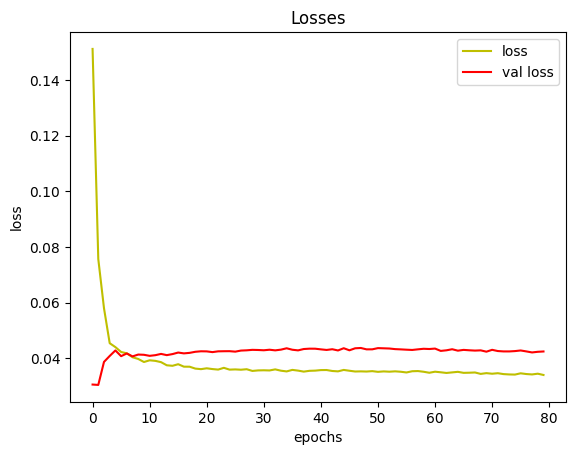

In [32]:
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

x = np.arange(0, len(history_LSTM.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
model_LSTM.evaluate(test_x, test_y)
y_pred = model_LSTM.predict(test_x)

4/4 [==============================] - 0s 2ms/step


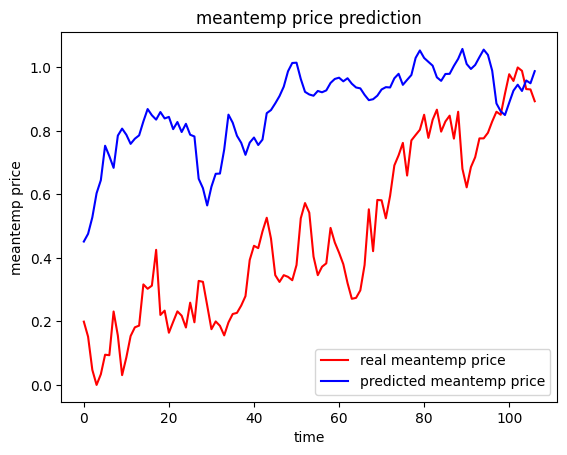

In [34]:
y_pred.shape

plt.plot(test_y, color='red', label='real meantemp price')
plt.plot(y_pred, color='blue', label='predicted meantemp price')
plt.title('meantemp price prediction')
plt.xlabel('time')
plt.ylabel('meantemp price')
plt.legend()
plt.show()

In [35]:
# CNN

model_CNN = Sequential()
model_CNN.add(Conv1D(filters=30,activation='relu', input_shape=(train_x.shape[1:]), padding='same', kernel_size=3))
model_CNN.add(Conv1D(filters=30, activation='relu', padding='same', kernel_size=3))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(30,activation='relu'))
model_CNN.add(Dense(1))

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 30)             300       
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 30)             2730      
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 30)             0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 90)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                2730      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                      

In [36]:
model_CNN.compile(loss='mse', optimizer='adam')
history_CNN = model_CNN.fit(train_x, train_y, epochs=80, batch_size=16, validation_split=0.1, shuffle=False)

Epoch 1/80
82/82 [==============================] - 1s 3ms/step - loss: 0.1178 - val_loss: 0.0331
Epoch 2/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0457
Epoch 3/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0483 - val_loss: 0.0458
Epoch 4/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0463 - val_loss: 0.0455
Epoch 5/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.0451
Epoch 6/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0451
Epoch 7/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0426 - val_loss: 0.0443
Epoch 8/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0441
Epoch 9/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0441
Epoch 10/80
82/82 [==============================] - 0s 2ms/step - loss: 0.0402 - val_loss: 0.0439
Epoch 11/80
82/82 [

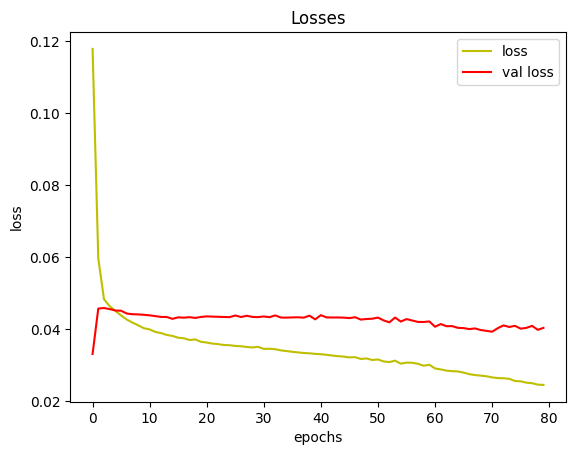

In [37]:
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

x = np.arange(0, len(history_CNN.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:

model_CNN.evaluate(test_x, test_y)
y_pred = model_CNN.predict(test_x)

4/4 [==============================] - 0s 1ms/step


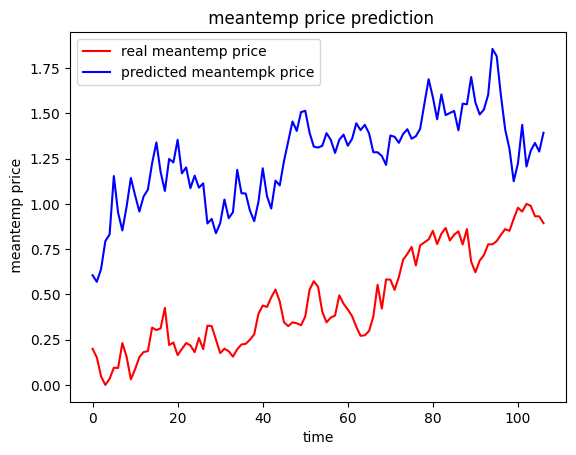

In [39]:
y_pred.shape

plt.plot(test_y, color='red', label='real meantemp price')
plt.plot(y_pred, color='blue', label='predicted meantempk price')
plt.title(' meantemp price prediction')
plt.xlabel('time')
plt.ylabel(' meantemp price')
plt.legend()
plt.show()